## Data visualization for continuous ratings

Author: Zizhuang Miao

This script visualizes and produces summaries of the continous rating results of social interactions and theory of mind.

In [1]:
### ALWAYS RUN FIRST ###
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_context('paper')

def median_abs_deviation(data, ignore_nan=True):
    if ignore_nan:
        median = np.nanmedian(data)
        mad = np.nanmedian(np.abs(data - median))
    else:
        median = np.median(data)
        mad = np.median(np.abs(data - median))
    return mad

### Ratings by participants

In [11]:
dataDir = 'C:\\'

allData_social = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(os.path.join(dataDir, "continuous_social_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        if n == 7 and s == 1:
            print(lastTimePoint[-1])
        allData_social = pd.concat([allData_social, trialData], ignore_index=True)

1133.4399999999998


Text(0, 0.5, 'Social interactions')

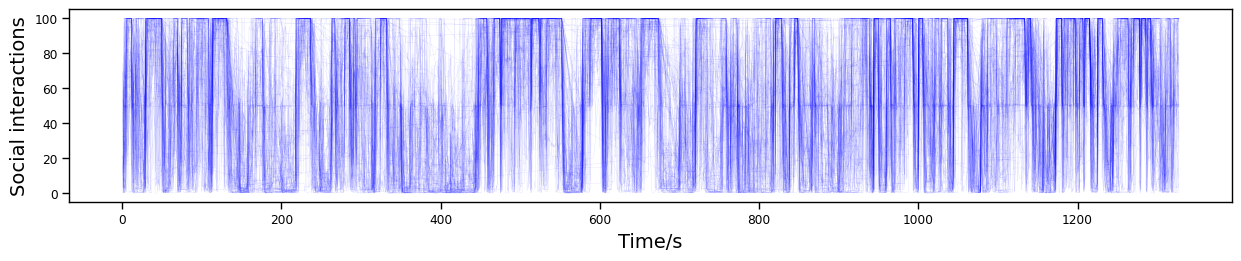

In [65]:
subList = list(np.unique(allData_social['ID']))

# visualization
f1, ax = plt.subplots(figsize=(15, 2.5))

for sub in subList:
    subData = allData_social[allData_social['ID']==sub]
    sns.lineplot(data=subData, x='time', y='rating', ax=ax, color='blue', linewidth=0.2, alpha=0.15)
ax.set_xlabel('Time/s', size=14)
ax.set_ylabel('Social interactions', size=14)

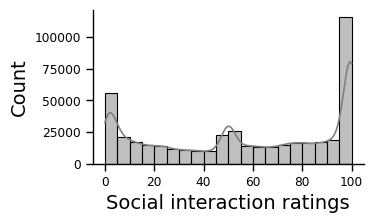

In [4]:
f2 = plt.figure(figsize=(3.5, 2))
sns.histplot(data=allData_social, x='rating', figure=f2, bins=20, color='gray', kde=True)
plt.xlabel('Social interaction ratings', size=14)
plt.ylabel('Count', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)

median

<Axes: xlabel='median', ylabel='Count'>

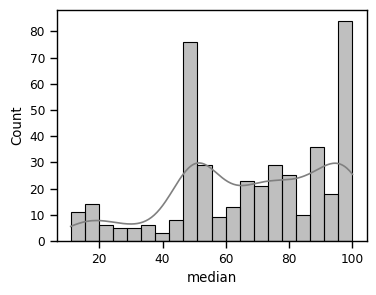

In [4]:
dataDir = 'C:\\'

allData = pd.DataFrame()

for n in range(1,9):
    com_data = pd.read_csv(os.path.join(dataDir, f"narrative{n}_median.csv"))
    validPoints = com_data['included']==1
    dataPlotted = com_data[validPoints]
    
    allData = pd.concat([allData_social, dataPlotted], ignore_index=True)

allData= allData.reset_index(drop=True)

f3 = plt.figure(figsize=(4, 3))
sns.histplot(data=allData, x='median', figure=f3, bins=20, color='gray', kde=True)

In [7]:
dataDir = 'C:\\'

allData_tom = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(os.path.join(dataDir, "continuous_tom_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_tom = pd.concat([allData_tom, trialData], ignore_index=True)

Text(0, 0.5, 'Theory of mind')

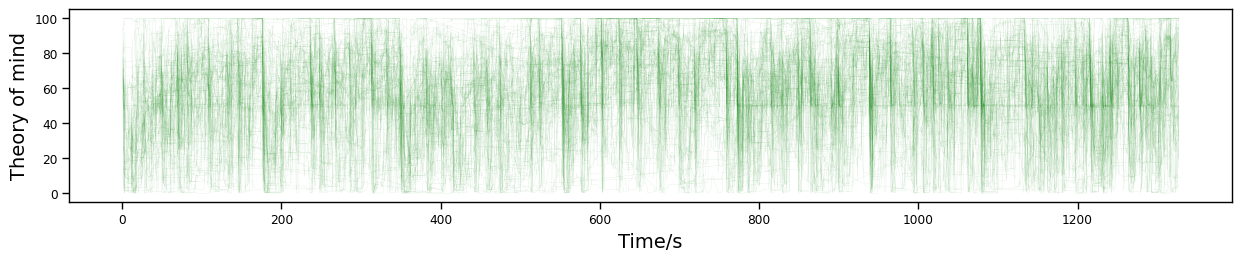

In [66]:
subList = np.unique(allData_tom['ID'])

# visualization
f1, ax = plt.subplots(figsize=(15, 2.5))

for sub in subList:
    subData = allData_tom[allData_tom['ID']==sub]
    sns.lineplot(data=subData, x='time', y='rating', ax=ax, color='green', linewidth=0.2, alpha=0.15)
ax.set_xlabel('Time/s', size=14)
ax.set_ylabel('Theory of mind', size=14)

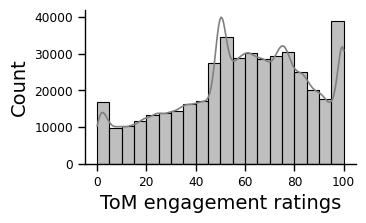

In [7]:
f2 = plt.figure(figsize=(3.5, 2))
sns.histplot(data=allData_tom, x='rating', figure=f2, bins=20, color='gray', kde=True)
plt.xlabel('ToM engagement ratings', size=14)
plt.ylabel('Count', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)

median

<Axes: xlabel='median', ylabel='Count'>

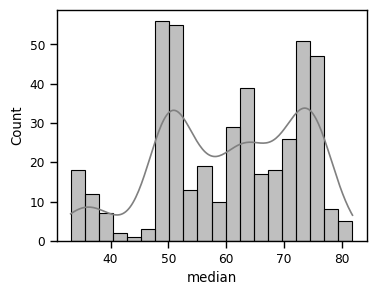

In [28]:
dataDir = 'C:\\Users\\f006fkn\\Desktop\\SpacetopNarrativesStudy\\projects_crowdsourcing_social-tom\\derivedData\\combined_tom_consensus'

allData = pd.DataFrame()

for n in range(1,9):
    com_data = pd.read_csv(os.path.join(dataDir, f"narrative{n}_median.csv"))
    validPoints = com_data['included']==1
    dataPlotted = com_data[validPoints]
    
    allData = pd.concat([allData_social, dataPlotted], ignore_index=True)

allData= allData.reset_index(drop=True)

f3 = plt.figure(figsize=(4, 3))
sns.histplot(data=allData, x='median', figure=f3, bins=20, color='gray', kde=True)

### Plot social interactions and ToM ratings

Text(0.5, 0.02, 'Time/s')

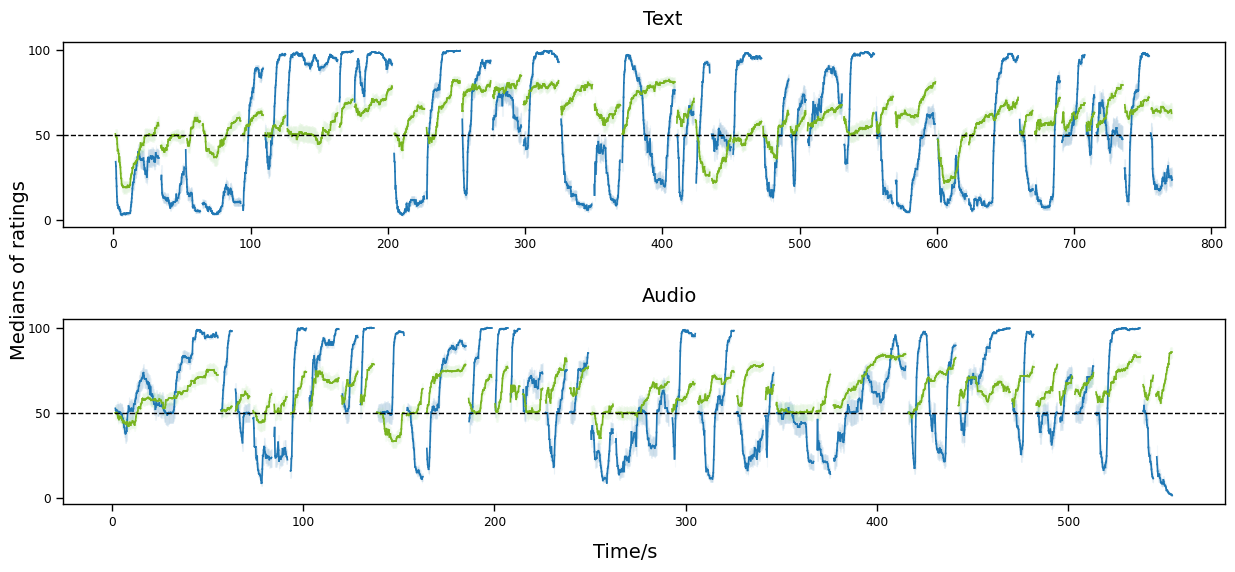

In [45]:
socialDataDir = 'C:\\'
tomDataDir = 'C:\\'

# plot the social interaction and tom ratings on top of each other
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharey=True)

modalityDict = {'Text':[3, 4, 1, 2], 'Audio': [7, 8, 5, 6]}
nMod = 0

for mod in modalityDict:
    lastTimepoint = []
    nPar = []

    for j, n in enumerate(modalityDict[mod]):
        # read median data for one narrative
        social_data = pd.read_csv(os.path.join(socialDataDir, f"narrative{n}_median.csv"))
        tom_data = pd.read_csv(os.path.join(tomDataDir, f"narrative{n}_median.csv"))

        for s in range(1,10):
            trial_data = social_data[social_data['situation']==s]
            nPar.append(trial_data.iloc[0, 3])

        validPoints_social = social_data['included']==1
        dataPlotted_social = social_data[validPoints_social]
        indices_social = dataPlotted_social.index    # only plot the "included" data points

        validPoints_tom = tom_data['included']==1
        dataPlotted_tom = tom_data[validPoints_tom]
        indices_tom = dataPlotted_tom.index 

        # adjust time for the second narrative in the modality
        if j == 0:
            lastTimepoint.append(trial_data.iloc[-1, 1])
        else:
            dataPlotted_social.loc[:, 'time'] = dataPlotted_social.loc[:, 'time'] + lastTimepoint[-1]
            dataPlotted_tom.loc[:, 'time'] = dataPlotted_tom.loc[:, 'time'] + lastTimepoint[-1]
            lastTimepoint.append(dataPlotted_social.iloc[-1, 1])

        # plot the data on a line plot
        for i in range(len(indices_social) - 1):
            if indices_social[i+1] - indices_social[i] == 1:  # They are adjacent in the original DataFrame
                sns.lineplot(x=dataPlotted_social['time'].iloc[i:i+2], y=dataPlotted_social['median'].iloc[i:i+2], 
                            ax=ax[nMod], color='#1F77B4')
                ci = dataPlotted_social['mad'].iloc[i]/np.sqrt(dataPlotted_social['validPar_time'].iloc[i]) * 1.96
                ax[nMod].fill_between(dataPlotted_social['time'].iloc[i:i+2], dataPlotted_social['median'].iloc[i]-ci, 
                                dataPlotted_social['median'].iloc[i]+ci, color='#2178B5', alpha=0.05)
        
        for i in range(len(indices_tom) - 1):    
            if indices_tom[i+1] - indices_tom[i] == 1:  
                sns.lineplot(x=dataPlotted_tom['time'].iloc[i:i+2], y=dataPlotted_tom['median'].iloc[i:i+2], 
                            ax=ax[nMod], color='#78B41F')
                ci = dataPlotted_tom['mad'].iloc[i]/np.sqrt(dataPlotted_tom['validPar_time'].iloc[i]) * 1.96
                ax[nMod].fill_between(dataPlotted_tom['time'].iloc[i:i+2], dataPlotted_tom['median'].iloc[i]-ci, 
                                dataPlotted_tom['median'].iloc[i]+ci, color='#AEEF9F', alpha=0.05)

    ax[nMod].set_xlabel("")
    ax[nMod].set_ylabel("")
    ax[nMod].text(x=dataPlotted_social['time'].iloc[-1]/2, y=115, s=mod, fontsize=14)    # title
    ax[nMod].set_yticks([0, 50, 100])
    ax[nMod].axhline(y=50, linestyle='--', color='black', linewidth=1)
    
    plt.subplots_adjust(hspace=0.5)

    nMod += 1

f.text(0.09, 0.5, 'Medians of ratings', va='center', rotation='vertical', size=14)
f.text(0.5, 0.02, 'Time/s', ha='center', size=14)

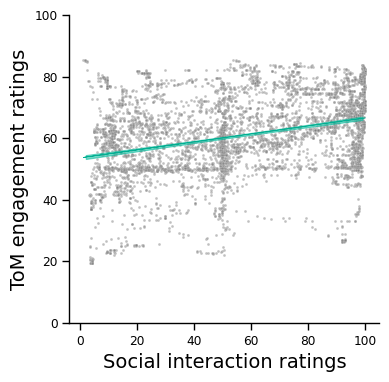

In [10]:
# plot the scatter plot with regression line
import statsmodels.api as sm

socialDataDir = 'C:\\'
tomDataDir = 'C:\\'

# plot the social interaction and tom ratings on top of each other
f, ax = plt.subplots( figsize=(4, 4))

modalityDict = {'Text':[3, 4, 1, 2], 'Audio': [7, 8, 5, 6]}

median_social = pd.Series()
median_tom = pd.Series()

for mod in modalityDict:
    lastTimepoint = []
    nPar = []

    for j, n in enumerate(modalityDict[mod]):
        # read median data for one narrative
        social_data = pd.read_csv(os.path.join(socialDataDir, f"narrative{n}_median.csv"))
        tom_data = pd.read_csv(os.path.join(tomDataDir, f"narrative{n}_median.csv"))

        for s in range(1,10):
            trial_data = social_data[social_data['situation']==s]
            nPar.append(trial_data.iloc[0, 3])
        
        dataPlotted_social = social_data.copy()
        dataPlotted_social.loc[social_data['included']==0, 'median'] = np.nan
        median_social = pd.concat([median_social, dataPlotted_social['median']], ignore_index=True)

        dataPlotted_tom = tom_data.copy()
        dataPlotted_tom.loc[tom_data['included']==0, 'median'] = np.nan
        median_tom = pd.concat([median_tom, dataPlotted_tom['median']], ignore_index=True)

df = pd.DataFrame({'median_social': median_social.values, 'median_tom': median_tom.values})
df = df.dropna()

sns.scatterplot(data=df, x='median_social', y='median_tom', s=4, alpha=0.5, color='gray')

# Fit the OLS regression line
X = sm.add_constant(df['median_social'])
model = sm.OLS(df['median_tom'], X)
results = model.fit()
predicted = results.predict(X)
# plot the regression line
plt.plot(df['median_social'], predicted, color='#02AE91', linewidth=0.4)

# Plot the confidence intervals of the prediction
intervals = np.arange(start=2, stop=100, step=1)
intvs = sm.add_constant(intervals)
plt.fill_between(intervals, results.predict(intvs) - 1.96*results.get_prediction(intvs).se_mean, 
                 results.predict(intvs) + 1.96*results.get_prediction(intvs).se_mean, color='#12BEA1', alpha=0.6)

# Add the correlation values
# plt.text(np.max(df['median_social'])-20, np.min(df['median_tom'])+8, 
#         f"Pearson's r = {pearson_median:.2f}\nSpearman's rho = {spearman_median:.2f}", ha='left', va='top')

# Set the labels and title
plt.xlabel('Social interaction ratings', size=14)
plt.ylabel('ToM engagement ratings', size=14)

# set y axis limits to 0 and 100
plt.ylim(0, 100)

sns.despine(top=True, right=True, left=False, bottom=False)

# Save the plot
# plt.savefig('C:\\Users\\f006fkn\\Desktop\\SpacetopNarrativesStudy\\projects_crowdsourcing_social-tom\\results_analysis\\figures\\social-v-tom_median_all_scatter.svg')
# Show the plot
plt.show()